In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
pip install xlrd>=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl xlrd


In [4]:
df = pd.read_excel("cardiotocography.xls")

In [5]:
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [7]:
# first we are performing the analysis only for the column NSP so we need to remove the other columns(classification columns) except NSP

In [8]:
df.drop(columns = ['A','B','C','D','E','AD','DE','LD','FS','SUSP','CLASS'],axis = 1,inplace = True)

In [9]:
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2126,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
NSP         4
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,S8001045.dsp,1998-06-06,CTG2124.txt,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,S8001045.dsp,1998-06-06,CTG2125.txt,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,S8001045.dsp,1998-06-06,CTG2126.txt,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [13]:
df.shape

(2126, 29)

In [14]:
df.size

61654

In [15]:
df.describe()

,Date,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,1996-04-22 16:59:22.746942592,878.439793,1702.877234,133.303857,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
min,1980-01-04 00:00:00,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,1996-05-02 00:00:00,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,1996-08-21 00:00:00,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,1997-03-20 00:00:00,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,1998-06-06 00:00:00,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000
std,NaN,894.084748,930.919143,9.840844,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377


In [16]:
# we also dont need the columns like FileName, Date, b , e ans SegFile so we remove them too

In [17]:
df.drop(columns = ['FileName','Date','b','e','SegFile'],axis = 1,inplace = True)

In [18]:
df

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [19]:
# lets check the values assosiated with the NSP column
df.NSP.value_counts()

NSP
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [20]:
# but there is a bias in the target column so better to make them stable later at the time of predictions

<Axes: xlabel='NSP', ylabel='count'>

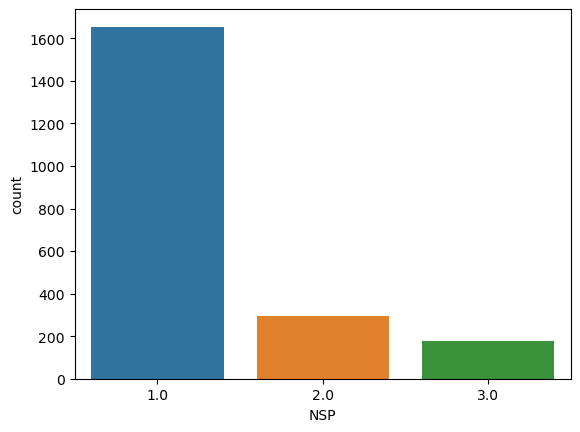

In [21]:
sns.countplot(x = 'NSP',data = df)

In [22]:
# this indicates a clear bias in the target column
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Your code here


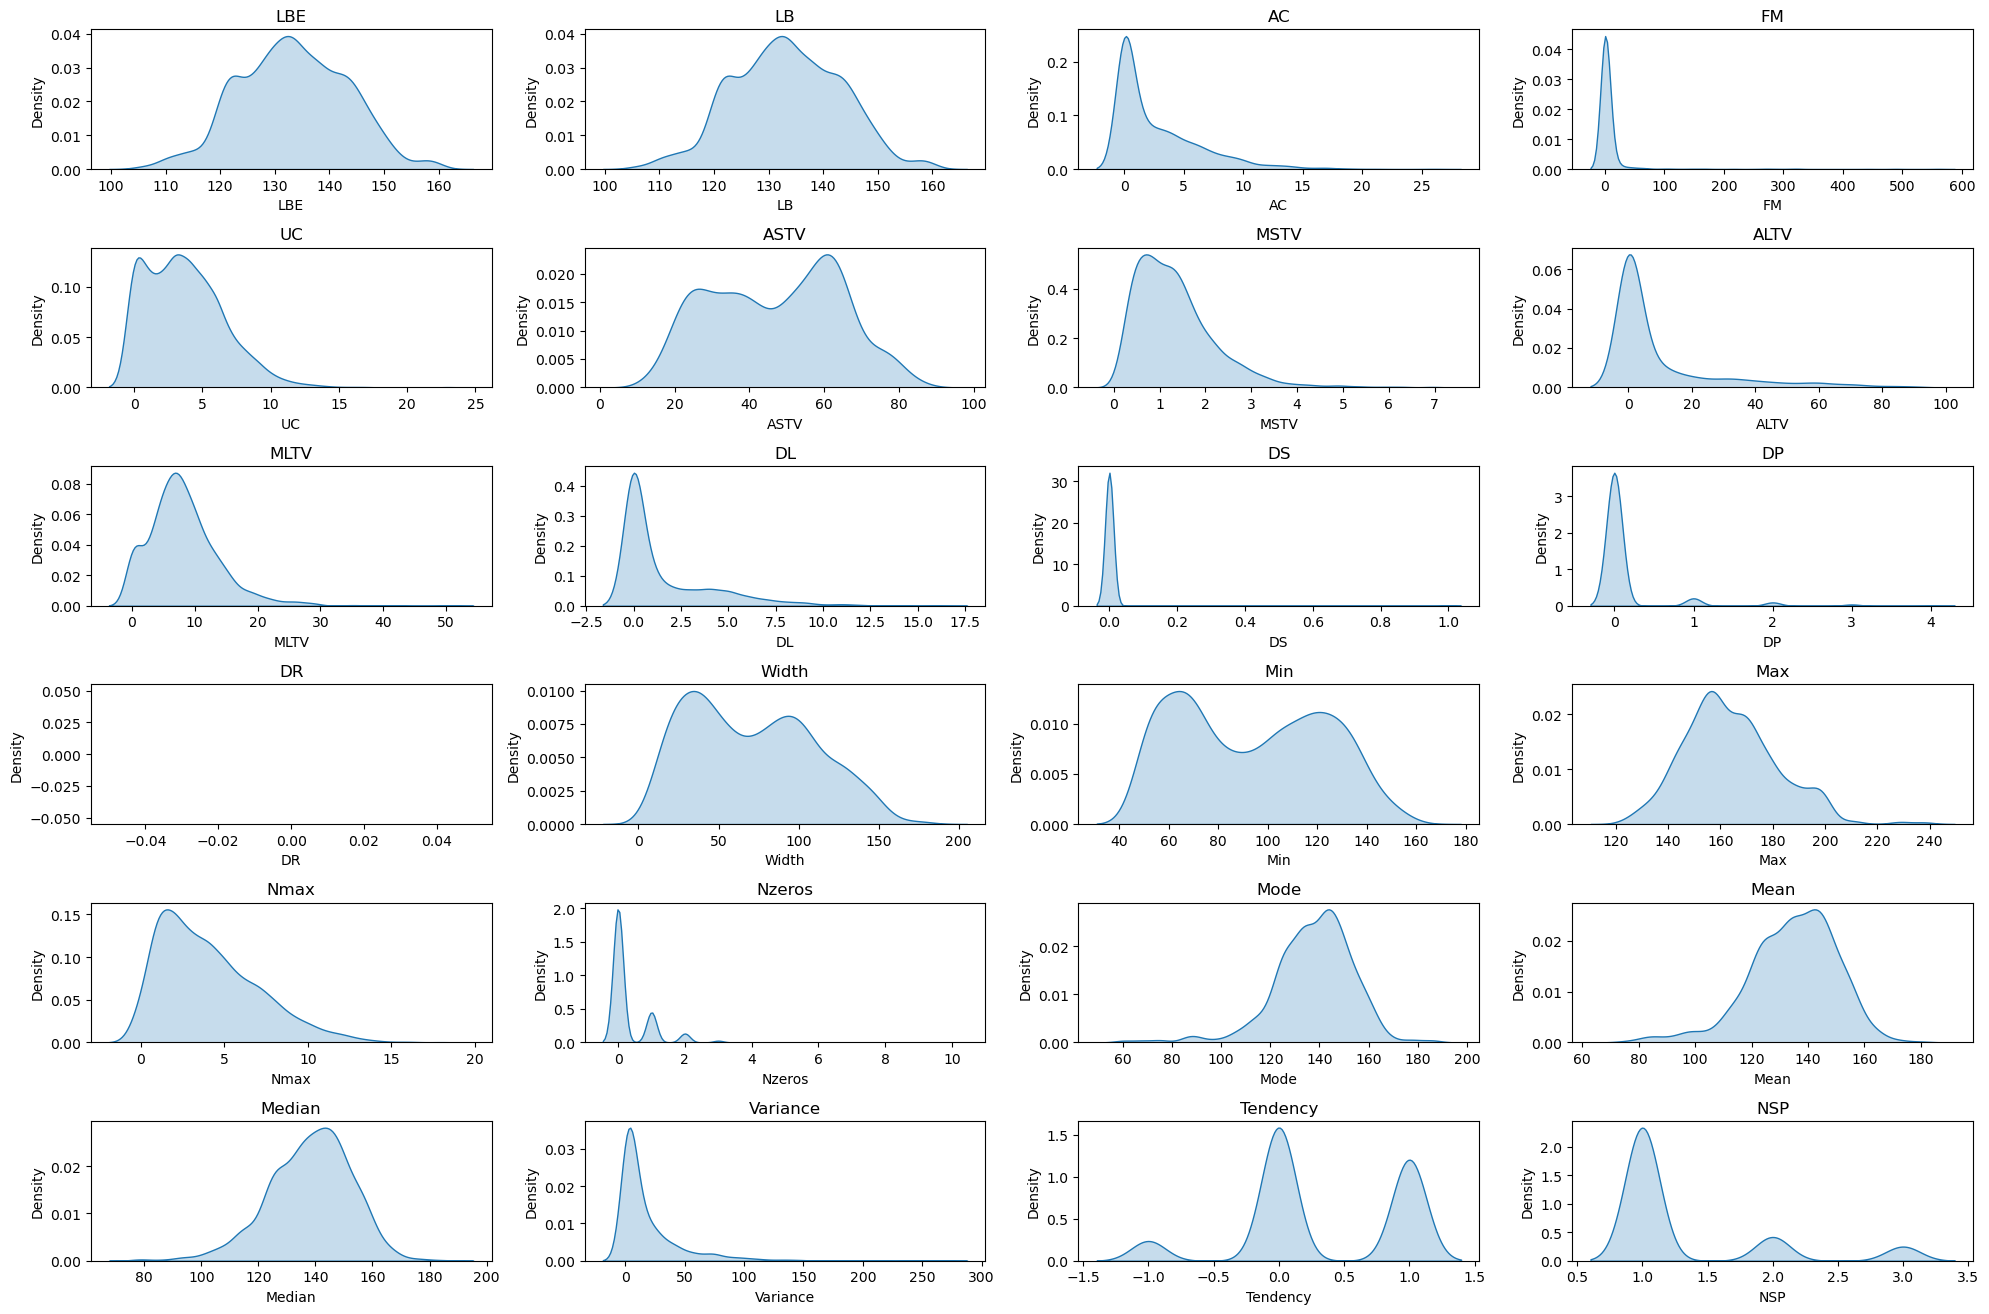

In [23]:
num_columns = len(df.select_dtypes(include='number').columns)

# Determine the number of rows and columns for the subplots
num_rows = (num_columns // 4) + 1
num_cols = 4

# Create the subplots
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(df[column], shade=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [24]:
print(df['FM'].skew())

9.427496283028857


In [23]:
skewness_threshold = 1.0

for column in df.select_dtypes(include='number').columns:
    skewness = df[column].skew()
    print(f'Skewness of {column}: {skewness}')
    if abs(skewness) > skewness_threshold:
        df[column] = np.log1p(df[column])
        print(f'Applied log transformation to {column}')

print("\nTransformed DataFrame:")
df

Skewness of LBE: 0.020312188952443314
Skewness of LB: 0.020312188952443314
Skewness of AC: 1.658829902629592
Applied log transformation to AC
Skewness of FM: 9.427496283028857
Applied log transformation to FM
Skewness of UC: 0.8353462988574905
Skewness of ASTV: -0.011828576215617885
Skewness of MSTV: 1.6573392037917811
Applied log transformation to MSTV
Skewness of ALTV: 2.195075308589335
Applied log transformation to ALTV
Skewness of MLTV: 1.331997908405182
Applied log transformation to MLTV
Skewness of DL: 1.8191194912030881
Applied log transformation to DL
Skewness of DS: 17.353456855396775
Applied log transformation to DS
Skewness of DP: 4.2358881887879685
Applied log transformation to DP
Skewness of DR: 0.0
Skewness of Width: 0.3142347525780295
Skewness of Min: 0.11578402114160359
Skewness of Max: 0.5778624481956025
Skewness of Nmax: 0.8928859138940057
Skewness of Nzeros: 3.9202873713190662
Applied log transformation to Nzeros
Skewness of Mode: -0.9951778449153655
Skewness of Mean

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,120.0,0.000000,0.000000,0.0,73.0,0.405465,3.784190,1.223775,0.000000,...,62.0,126.0,2.0,0.000000,120.0,137.0,121.0,4.304065,1.0,1.098612
2,132.0,132.0,1.609438,0.000000,4.0,17.0,1.131402,0.000000,2.433613,1.098612,...,68.0,198.0,6.0,0.693147,141.0,136.0,140.0,2.564949,0.0,0.693147
3,133.0,133.0,1.098612,0.000000,5.0,16.0,1.131402,0.000000,2.667228,1.098612,...,68.0,198.0,5.0,0.693147,141.0,135.0,138.0,2.639057,0.0,0.693147
4,134.0,134.0,1.098612,0.000000,6.0,16.0,1.223775,0.000000,3.178054,1.098612,...,53.0,170.0,11.0,0.000000,137.0,134.0,137.0,2.639057,1.0,0.693147
5,132.0,132.0,1.609438,0.000000,5.0,16.0,1.223775,0.000000,3.039749,0.000000,...,53.0,170.0,9.0,0.000000,137.0,136.0,138.0,2.484907,1.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,140.0,0.000000,0.000000,6.0,79.0,0.182322,3.258097,2.104134,0.000000,...,137.0,177.0,4.0,0.000000,153.0,150.0,152.0,1.098612,0.0,1.098612
2123,140.0,140.0,0.693147,0.000000,9.0,78.0,0.336472,3.135494,2.091864,0.000000,...,103.0,169.0,6.0,0.000000,152.0,148.0,151.0,1.386294,1.0,1.098612
2124,140.0,140.0,0.693147,0.000000,7.0,79.0,0.336472,3.044522,1.960095,0.000000,...,103.0,170.0,5.0,0.000000,153.0,148.0,152.0,1.609438,1.0,1.098612
2125,140.0,140.0,0.693147,0.000000,9.0,78.0,0.336472,3.332205,2.079442,0.000000,...,103.0,169.0,6.0,0.000000,152.0,147.0,151.0,1.609438,1.0,1.098612


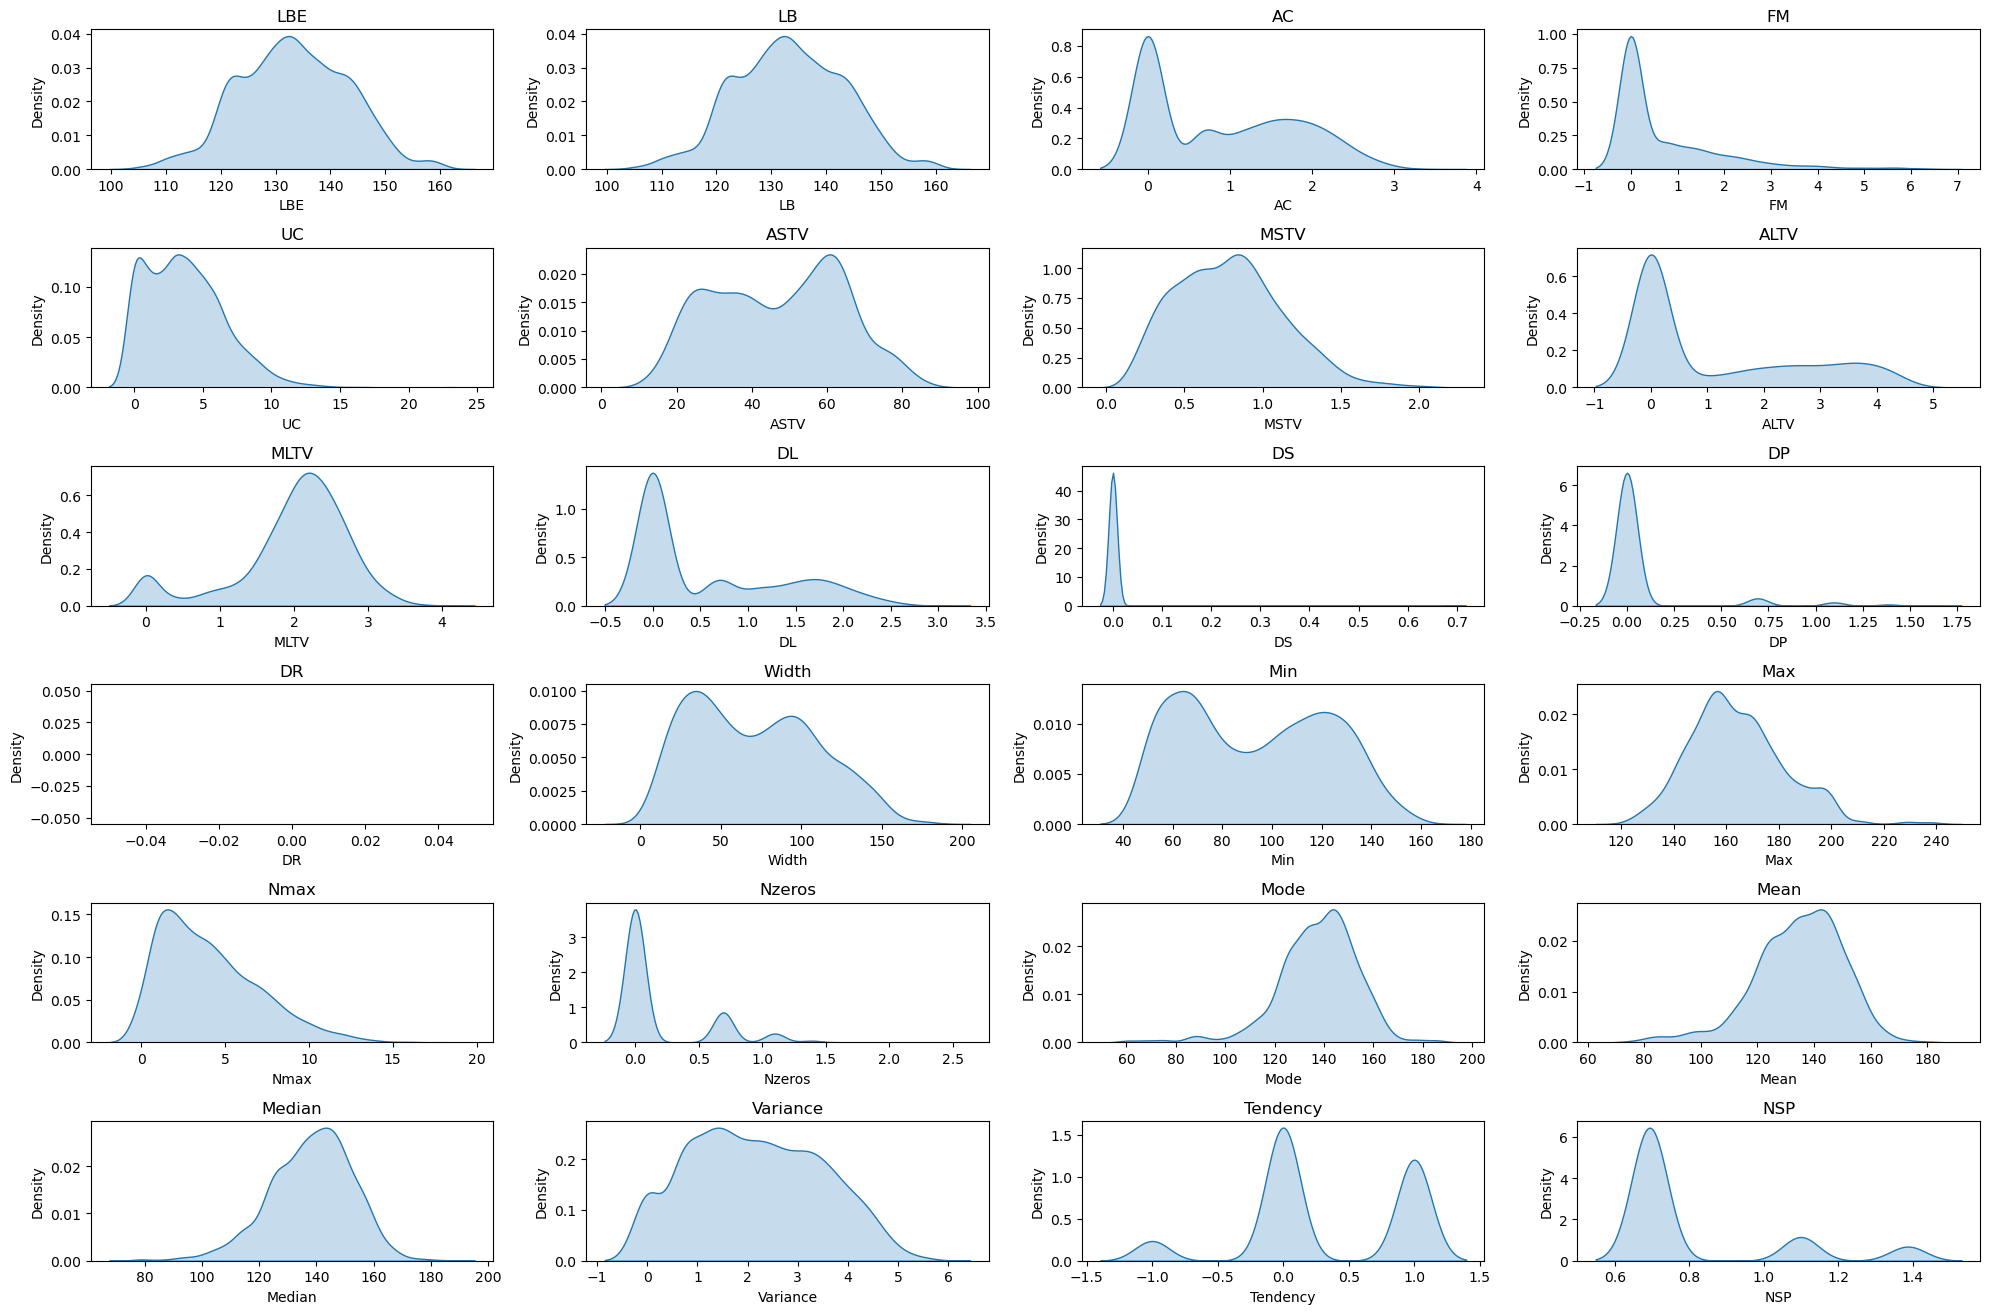

In [26]:
num_columns = len(df.select_dtypes(include='number').columns)

# Determine the number of rows and columns for the subplots
num_rows = (num_columns // 4) + 1
num_cols = 4

# Create the subplots
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(df[column], shade=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [27]:
print(df['FM'].skew()) #therefore we reduced the skewness in the dataset

2.0256532819006723


<Axes: >

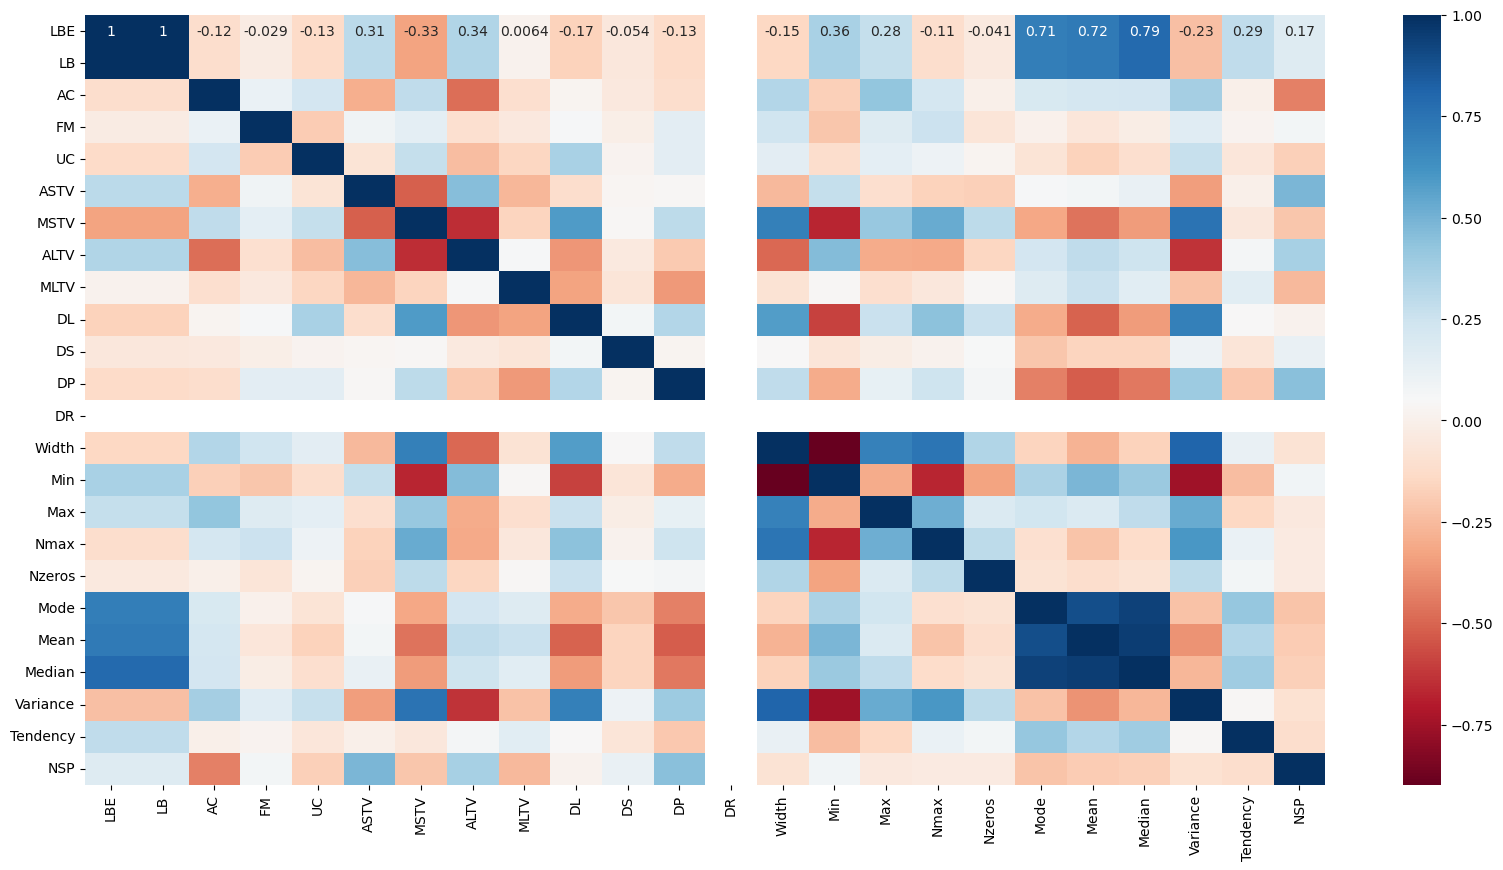

In [24]:
# lets check the correlation of the features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True,cmap="RdBu")

In [25]:
# from this it is clear that there is a multi linear collinearity among mode,mean,median
df.drop(columns = ['Median','Mode'],axis = 1,inplace = True)

In [30]:
df

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,DR,Width,Min,Max,Nmax,Nzeros,Mean,Variance,Tendency,NSP
1,120.0,120.0,0.000000,0.000000,0.0,73.0,0.405465,3.784190,1.223775,0.000000,...,0.0,64.0,62.0,126.0,2.0,0.000000,137.0,4.304065,1.0,1.098612
2,132.0,132.0,1.609438,0.000000,4.0,17.0,1.131402,0.000000,2.433613,1.098612,...,0.0,130.0,68.0,198.0,6.0,0.693147,136.0,2.564949,0.0,0.693147
3,133.0,133.0,1.098612,0.000000,5.0,16.0,1.131402,0.000000,2.667228,1.098612,...,0.0,130.0,68.0,198.0,5.0,0.693147,135.0,2.639057,0.0,0.693147
4,134.0,134.0,1.098612,0.000000,6.0,16.0,1.223775,0.000000,3.178054,1.098612,...,0.0,117.0,53.0,170.0,11.0,0.000000,134.0,2.639057,1.0,0.693147
5,132.0,132.0,1.609438,0.000000,5.0,16.0,1.223775,0.000000,3.039749,0.000000,...,0.0,117.0,53.0,170.0,9.0,0.000000,136.0,2.484907,1.0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,140.0,0.000000,0.000000,6.0,79.0,0.182322,3.258097,2.104134,0.000000,...,0.0,40.0,137.0,177.0,4.0,0.000000,150.0,1.098612,0.0,1.098612
2123,140.0,140.0,0.693147,0.000000,9.0,78.0,0.336472,3.135494,2.091864,0.000000,...,0.0,66.0,103.0,169.0,6.0,0.000000,148.0,1.386294,1.0,1.098612
2124,140.0,140.0,0.693147,0.000000,7.0,79.0,0.336472,3.044522,1.960095,0.000000,...,0.0,67.0,103.0,170.0,5.0,0.000000,148.0,1.609438,1.0,1.098612
2125,140.0,140.0,0.693147,0.000000,9.0,78.0,0.336472,3.332205,2.079442,0.000000,...,0.0,66.0,103.0,169.0,6.0,0.000000,147.0,1.609438,1.0,1.098612


<Axes: >

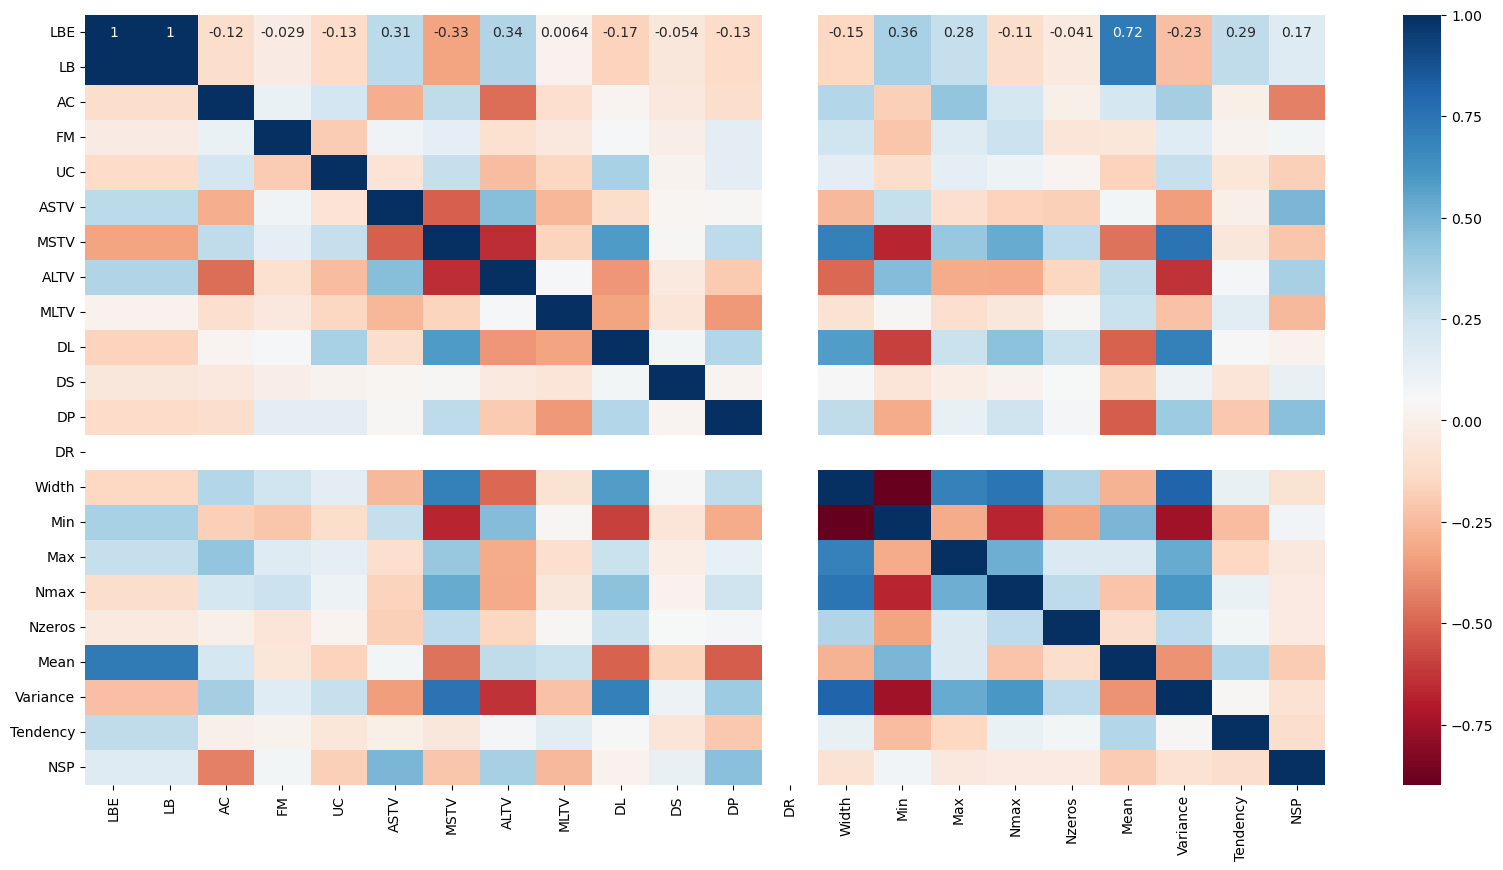

In [26]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot = True,cmap="RdBu")

In [27]:
df.drop("LBE",axis = 1,inplace = True)

<Axes: >

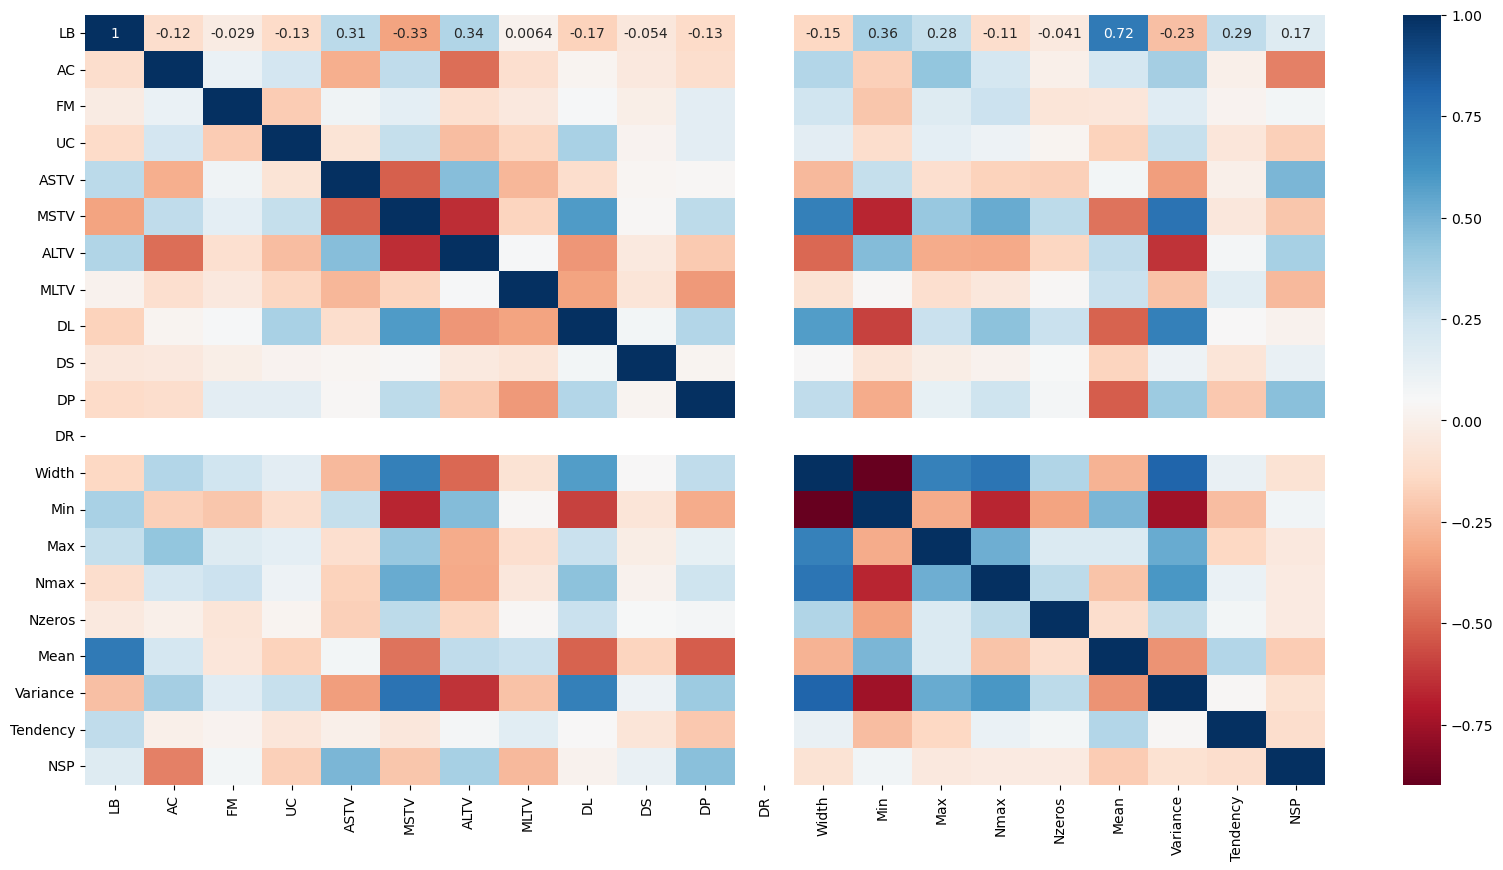

In [28]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot = True,cmap="RdBu")

In [29]:
# # checking for the outliers 
# plt.figure(figsize=(20,10))

# sns.boxplot(data = df)

X = df.drop("NSP",axis = 1)

y = df['NSP']


In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Assuming X and y are already defined

# Create a pipeline with SMOTE followed by RandomUnderSampler

y = pd.Series(y).astype('category').cat.codes

pipeline = Pipeline([
    # ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # Oversample minority class
    ('under', RandomUnderSampler(sampling_strategy='auto', random_state=42))  # Undersample majority class
])

# Apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Print class distribution after resampling
from collections import Counter
print("Class distribution after SMOTE + Undersampling:")
print(Counter(y_resampled))


Class distribution after SMOTE + Undersampling:
Counter({0: 176, 1: 176, 2: 176})


In [31]:
X = X_resampled
y = y_resampled

In [32]:
X.shape

(528, 20)

In [33]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# y = label_encoder.fit_transform(y)

In [34]:
print("Now we are left with the following columns :",list(df.columns))

Now we are left with the following columns : ['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mean', 'Variance', 'Tendency', 'NSP']


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size=0.3,random_state=2)

In [36]:
print("the X_train dataset size is : ",X_train.shape)
print("the X_test dataset size is : ",X_test.shape)
print("the y_train dataset size is : ",y_train.shape)
print("the X_test dataset size is : ",X_test.shape)

the X_train dataset size is :  (369, 20)
the X_test dataset size is :  (159, 20)
the y_train dataset size is :  (369,)
the X_test dataset size is :  (159, 20)


In [37]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV




In [43]:
from sklearn.linear_model import LogisticRegression

# Define the model and parameter grid
model_lr = LogisticRegression()
params_LR = {
    "tol": [0.0001, 0.0002, 0.0003],
    "C": [0.01, 0.1, 1, 10, 100],
    "intercept_scaling": [1, 2, 3, 4],
    "solver": ["liblinear", "lbfgs", "newton-cg"],
    "max_iter": [100, 200, 300]
}

# Perform grid search
grid_search_lr = GridSearchCV(estimator=model_lr, 
                              param_grid=params_LR, 
                              cv=3, 
                              scoring="accuracy", 
                              return_train_score=True)
grid_search_lr.fit(X_train, y_train)

# Predictions and metrics
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print(f"Logistic Regression - Best Score: {round(grid_search_lr.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_lr}, \nPrecision: {precision_lr}, \nRecall: {recall_lr}, \nF1 Score: {f1_lr}")


Logistic Regression - Best Score: 0.856

Accuracy: 0.8301886792452831, 
Precision: 0.8340743150437361, 
Recall: 0.8301886792452832, 
F1 Score: 0.8308562625767931


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model and parameter grid
model_dt = DecisionTreeClassifier()
params_DT = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform grid search
grid_search_dt = GridSearchCV(estimator=model_dt, 
                              param_grid=params_DT, 
                              cv=3, 
                              scoring="accuracy", 
                              return_train_score=True)
grid_search_dt.fit(X_train, y_train)

# Predictions and metrics
y_pred_dt = grid_search_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

print(f"Decision Tree - Best Score: {round(grid_search_dt.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_dt}, \nPrecision: {precision_dt}, \nRecall: {recall_dt}, \nF1 Score: {f1_dt}")


Decision Tree - Best Score: 0.859

Accuracy: 0.8427672955974843, 
Precision: 0.8420875420875422, 
Recall: 0.8427672955974842, 
F1 Score: 0.842088784486631


In [45]:
from sklearn.naive_bayes import GaussianNB

# Define the model
model_nb = GaussianNB()

# Fit the model
model_nb.fit(X_train, y_train)

# Predictions and metrics
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

print(f"\nNaive Bayes - Accuracy: {accuracy_nb}, \nPrecision: {precision_nb}, \nRecall: {recall_nb}, \nF1 Score: {f1_nb}")



Naive Bayes - Accuracy: 0.7484276729559748, 
Precision: 0.7834818775995247, 
Recall: 0.7484276729559749, 
F1 Score: 0.7463010584376862


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Define the model and parameter grid
model_rf = RandomForestClassifier()
params_RF = {
    "n_estimators": [50, 100, 200],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Perform grid search
grid_search_rf = GridSearchCV(estimator=model_rf, 
                              param_grid=params_RF, 
                              cv=3, 
                              scoring="accuracy", 
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)

# Predictions and metrics
y_pred_rf = grid_search_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print(f"Random Forest - Best Score: {round(grid_search_rf.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_rf}, \nPrecision: {precision_rf}, \nRecall: {recall_rf}, \nF1 Score: {f1_rf}")


Random Forest - Best Score: 0.894

Accuracy: 0.89937106918239, 
Precision: 0.899353150925478, 
Recall: 0.89937106918239, 
F1 Score: 0.8993072524372119


In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model and parameter grid
model_knn = KNeighborsClassifier()
params_KNN = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

# Perform grid search
grid_search_knn = GridSearchCV(estimator=model_knn, 
                               param_grid=params_KNN, 
                               cv=3, 
                               scoring="accuracy", 
                               return_train_score=True)
grid_search_knn.fit(X_train, y_train)

# Predictions and metrics
y_pred_knn = grid_search_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

print(f"KNN - Best Score: {round(grid_search_knn.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_knn}, \nPrecision: {precision_knn}, \nRecall: {recall_knn}, \nF1 Score: {f1_knn}")


KNN - Best Score: 0.786

Accuracy: 0.7421383647798742, 
Precision: 0.750589126505136, 
Recall: 0.7421383647798742, 
F1 Score: 0.7447663971248878


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define and fit the model
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Predictions and metrics
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f"Accuracy: {accuracy_svm:.3f}")
print(f"Precision: {precision_svm:.3f}")
print(f"Recall: {recall_svm:.3f}")
print(f"F1 Score: {f1_svm:.3f}")


Accuracy: 0.667
Precision: 0.704
Recall: 0.667
F1 Score: 0.666


In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model and parameter grid
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
params_XGB = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "gamma": [0, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "subsample": [0.7, 0.8, 1.0]
}

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=model_xgb, 
                               param_grid=params_XGB, 
                               cv=3, 
                               scoring="accuracy", 
                               return_train_score=True)
grid_search_xgb.fit(X_train, y_train)

# Predictions and metrics
y_pred_xgb = grid_search_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print(f"XGBoost - Best Score: {round(grid_search_xgb.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_xgb}, \nPrecision: {precision_xgb}, \nRecall: {recall_xgb}, \nF1 Score: {f1_xgb}")


XGBoost - Best Score: 0.911

Accuracy: 0.9119496855345912, 
Precision: 0.9113846567786634, 
Recall: 0.9119496855345912, 
F1 Score: 0.9114524539052841


In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model and parameter grid
model_ada = AdaBoostClassifier()
params_Ada = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2, 1.0]
}

# Perform grid search
grid_search_ada = GridSearchCV(estimator=model_ada, 
                               param_grid=params_Ada, 
                               cv=3, 
                               scoring="accuracy", 
                               return_train_score=True)
grid_search_ada.fit(X_train, y_train)

# Predictions and metrics
y_pred_ada = grid_search_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='macro')
recall_ada = recall_score(y_test, y_pred_ada, average='macro')
f1_ada = f1_score(y_test, y_pred_ada, average='macro')

print(f"AdaBoost - Best Score: {round(grid_search_ada.best_score_, 3)}")
print(f"\nAccuracy: {accuracy_ada}, \nPrecision: {precision_ada}, \nRecall: {recall_ada}, \nF1 Score: {f1_ada}")


AdaBoost - Best Score: 0.824

Accuracy: 0.7924528301886793, 
Precision: 0.8102600339174675, 
Recall: 0.7924528301886792, 
F1 Score: 0.7941336922661201
